# Customer Segmentation with **K-means**

Created by **Tetiana Yatsiuk**  
✉️ *Email:*  tet.yatsiuk@gmail.com  
🔗 [*LinkedIn*](www.linkedin.com/in/tetianayatsiuk)   , 💻 [*GitHub*](https://github.com/YatsiukTetiana)

# 🗂️ Project Summary

**Objectives**
- Segment customers based on purchase behavior and total spending.
- Identify distinct customer groups by applying K-means clustering technique.
- Interpret cluster characteristics to support personalized marketing or sales strategies.

**Tools Used**
- Pandas for data manipulation
- Scikit-learn for standardization and clustering (KMeans, StandardScaler)
- Matplotlib & Seaborn for visualization

#1. 📥 Data Preparation

Data contains two characteristics:  
- `purchases` - the number of purchases during a certain period  
- `spending` - the amount of money spent during the same period (USD)

In [ ]:
purchases = [
    57.0, 49.0, 50.0, 43.0, 47.0, 51.0, 44.0, 52.0, 47.0, 49.0, 47.0, 59.0, 50.0,
    45.0, 54.0, 44.0, 51.0, 40.0, 43.0, 51.0, 74.0, 27.0, 29.0, 31.0, 34.0, 8.0,
    29.0, 56.0, 25.0, 33.0, 35.0, 60.0, 34.0, 31.0, 27.0, 8.0, 13.0, 11.0, 8.0,
    12.0, 10.0, 13.0, 8.0, 9.0, 9.0, 6.0, 11.0, 11.0, 10.0, 9.0
]

spending = [
     524.84, 493.09, 532.38, 576.15, 488.29, 488.29, 578.96, 538.37, 476.53, 527.13,
     476.83, 476.71, 512.1, 404.34, 413.75, 471.89, 449.36, 515.71, 454.6, 429.38,
     329.54, 706.85, 295.37, 287.96, 240.86, 271.21, 281.57, 342.28, 313.74, 229.48,
     312.96, 284.6, 272.92, 324.47, 41.24, 107.23, 130.76, 299.28, 131.29, 47.61,
     116.44, 101.74, 194.02, 101.84, 60.25, 95.61, 107.14, 129.56, 89.63, 83.83
]


In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating a dataframe
data = pd.DataFrame({
    "purchases": purchases,
    "spending": spending,
})

#2. ⚖️ Data Standardization

Standardizing features to apply Euclidean distance correctly

In [ ]:
# Standartizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#3. 🔵 Clustering by k-means with 2 initial clusters (K = 2)

Applying KMeans with 2 clusters and plotting results:

In [ ]:
# training K-means model
kmeans = KMeans(n_clusters = 2, random_state = 5)
data["clusters"] = kmeans.fit_predict(data_scaled)

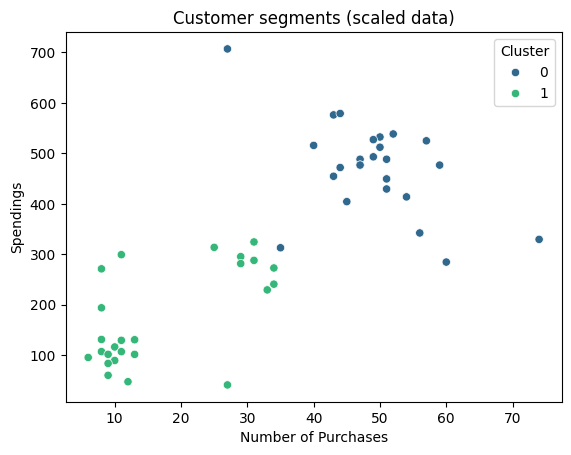

In [ ]:
# Visualizing result
plt.figure()

sns.scatterplot(data = data, x = "purchases", y = "spending", hue = "clusters", palette = "viridis")

plt.title("Customer segments (scaled data)")
plt.xlabel("Number of Purchases")
plt.ylabel("Spendings")
plt.legend(title = "Cluster")
plt.show()

The model identified two clusters, as mentioned in the clustering parameters of the model.
As the scatterplot shows, the data appear to have more than two clusters, especially between 20 and 40 purchases, where two points from different clusters are too close to each other but far from other points within their respective clusters.

#4. 📉 Finding an Optimal Number of Clusters
## Elbow Method for Optimal K

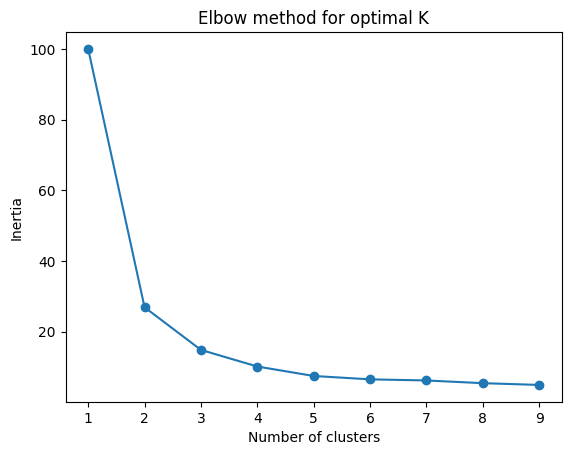

In [ ]:
# iterate on different values of K
inertia_values = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 5)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# "elbow" method visualization
plt.figure()
plt.plot(k_values, inertia_values, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for optimal K")
plt.show()

The optimal number of clusters due to the elbow method is 2 or 3.

# 5. 🔵 Final Clustering with Optimal Number of Clusters

In [ ]:
# training K-means model
kmeans_optimal = KMeans(n_clusters = 3, random_state = 5)
data["clusters_optimal"] = kmeans_optimal.fit_predict(data_scaled)

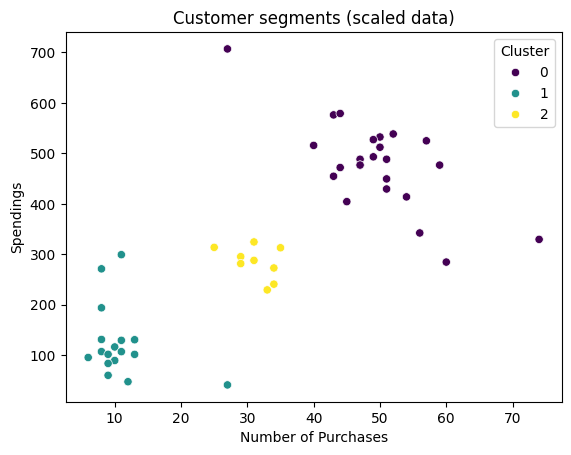

In [ ]:
# Visualizing result
plt.figure()

sns.scatterplot(data = data, x = "purchases", y = "spending", hue = "clusters_optimal", palette = "viridis")

plt.title("Customer segments (scaled data)")
plt.xlabel("Number of Purchases")
plt.ylabel("Spendings")
plt.legend(title = "Cluster")
plt.show()

The model detected 3 clusters:
- Low purchases and low spendings
- Middle purchases and middle spendings
- High purchases and high spendings

This model provides better result than the one with 2 clusters.

# 6. 🧾 Conclusions

The clustering analysis by ***K-means*** method identified 3 distinct customer segments:
- **Low-value customers** — low number of purchases and low total spending
- **Mid-value customers** — moderate purchases and spending
- **High-value customers** — frequent purchases and high spending

Compared to the 2-cluster solution, this segmentation provides a more granular and actionable understanding of customer behavior.   
The 3-cluster model allows the business to tailor marketing strategies more effectively by targeting each group based on their spending habits and engagement level.